In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import length,col
import matplotlib.pyplot as plt

In [2]:
# Stop any existing Spark context
try:
    spark.stop()
except:
    pass

# Optimized for i5 11th gen + 16GB RAM
spark = SparkSession.builder \
    .appName("Music_Classifier") \
    .master("local[2]") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memory", "2g") \
    .config("spark.sql.execution.arrow.pyspark.enabled", "false") \
    .getOrCreate()

In [ ]:
df_train = spark.read.csv("./notebook_data/Mendeley_cleaned_train.csv", header=True, inferSchema=True)

In [4]:
# Count songs per genre
df_train.groupBy("genre").count().show()

# Lyrics length column
df_train = df_train.withColumn("lyrics_length", length(col("lyrics")))

# Average lyrics length per genre
df_train.groupBy("genre").avg("lyrics_length").show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 5658|
|  blues| 3723|
|   jazz| 3130|
|hip hop|  707|
|country| 4382|
|   rock| 3195|
| reggae| 2018|
+-------+-----+

+-------+------------------+
|  genre|avg(lyrics_length)|
+-------+------------------+
|    pop| 481.5629197596324|
|  blues| 384.3228579102874|
|   jazz|445.00575079872203|
|hip hop| 614.5615275813295|
|country| 380.0264719306253|
|   rock| 408.6638497652582|
| reggae| 610.1516352824578|
+-------+------------------+



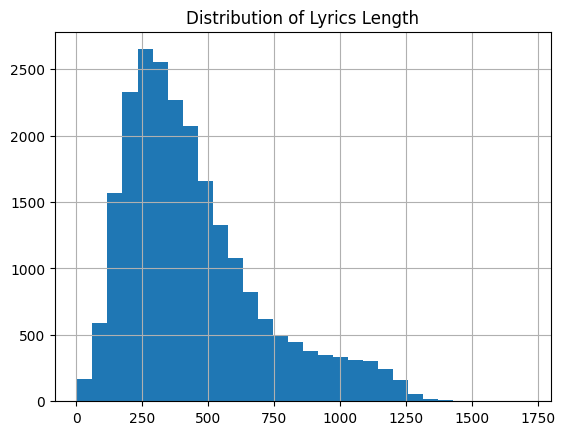

In [5]:
# Histogram of lyrics length
pdf = df_train.toPandas()
pdf["lyrics_length"].hist(bins=30)
plt.title("Distribution of Lyrics Length")
plt.show()